# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `3` | `Questions`

> "Hi Team! 👋

> Here we go again! The current script is prepared to help you to further exercise course content (But, again, do note that these are not assessment questions. They are for your exercise.)

> Some of the questions ask you to perform `reverse-engineering` 🧩. Instead of a question written in text format, you will be given the end results of some lines of code. Your task is to fill in the input cell with lines of code to create the output cell. Such a reverse-engineering exercise in computational programming will maximize your knowledge and skills in Computational Finance. 

> The questions below won’t be that difficult, as you have learned how to answer them from the lessons and the assigned readings. As you will notice from the questions, my intention is not just to give questions, but also to give additional learning pointers. I hope this helps 😊

> Enjoy!

##### First, let's do some quick exercise with stock prices data.

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import datetime

import warnings
warnings.filterwarnings("ignore")

### Let's try to import historical stock data from the web and from your machine.

#### How to import from the Web

> You may use `yfinance` library.

In [2]:
import yfinance as yf

> Let's start & end dates--we are interested in year 2021 until August.

In [3]:
start = datetime.datetime(2024, 1, 1)
end = datetime.datetime(2024, 8, 31)

> Then, let's use [Yahoo! Finance](https://sg.finance.yahoo.com/) for extracting historical stock data.

In [4]:
apple =\
(    yf
     .download("AAPL",
               start,
               end)
)

google =\
(    yf
     .download("GOOGL", 
               start,
               end)
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


> You may save the data to csv files.

In [5]:
apple.to_csv("apple_2024_stock.csv")
google.to_csv("google_2024_stock.csv")

#### Have a quick look at your data.

In [6]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495087,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500


In [7]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200
2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100
2024-01-04,138.419998,139.160004,136.350006,136.389999,136.053101,27137700
2024-01-05,136.750000,137.160004,135.149994,135.729996,135.394745,22506000
2024-01-08,136.289993,139.009995,136.259995,138.839996,138.497055,21404000


In [8]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02
mean,194.252380,196.172500,192.514821,194.389583,194.020255,6.168830e+07
std,20.554547,20.896348,20.132660,20.590587,20.712093,2.820863e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,3.029900e+07
25%,176.825001,178.592499,174.869999,178.139999,177.693039,4.596918e+07
50%,188.735001,190.285004,187.360001,188.740005,188.146538,5.353515e+07
75%,214.119995,216.962498,211.932499,214.252502,214.004791,6.862602e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [9]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,168.000000,168.000000,168.000000,168.000000,168.000000,1.680000e+02
mean,160.070476,161.745238,158.608928,160.225476,159.898376,2.762492e+07
std,15.661862,15.742355,15.547389,15.605793,15.629485,1.091537e+07
min,131.880005,133.240005,130.669998,131.399994,131.075424,1.024210e+07
25%,145.875000,146.632500,144.920006,145.977505,145.616940,2.103315e+07
50%,160.504997,163.440002,158.764999,160.834999,160.621857,2.448235e+07
75%,174.189995,175.357502,172.090000,173.610001,173.181171,3.117152e+07
max,190.309998,191.750000,189.029999,191.179993,190.926636,7.191000e+07


### We will `re-organize` and `re-shape` stock data

> Let's concatenate data in multiple DataFrame objects

> Let's obtain Apple adjusted close data for July and August 2021

In [10]:
apple_07=apple.loc["2024-07-01":"2024-07-31","Adj Close"].to_frame()

In [11]:
apple_07.head()

,Adj Close
Date,
2024-07-01,216.499405
2024-07-02,220.015335
2024-07-03,221.293854
2024-07-05,226.078308
2024-07-08,227.556610


In [12]:
apple_08=apple.loc["2024-08-01":"2024-08-31","Adj Close"].to_frame()

In [13]:
apple_08.head()

,Adj Close
Date,
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061
2024-08-06,206.990402
2024-08-07,209.577423


### Question 1-1. Please combine the first three rows of each of `apple_07` and `apple_08`

In [14]:
Combined_1_1_df=pd.concat([apple_07.head(3),apple_08.head(3)])
Combined_1_1_df

,Adj Close
Date,
2024-07-01,216.499405
2024-07-02,220.015335
2024-07-03,221.293854
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061


#### Question 1-2. How would you extract only the 2021 August GOOGL values?

In [15]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200
2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100
2024-01-04,138.419998,139.160004,136.350006,136.389999,136.053101,27137700
2024-01-05,136.750000,137.160004,135.149994,135.729996,135.394745,22506000
2024-01-08,136.289993,139.009995,136.259995,138.839996,138.497055,21404000
...,...,...,...,...,...,...
2024-08-26,166.380005,167.550003,164.460007,166.160004,165.939804,14190400
2024-08-27,165.839996,166.440002,164.460007,164.679993,164.461761,11821900
2024-08-28,165.039993,165.600006,161.529999,162.850006,162.634201,16407400


In [16]:
google_08=google.loc["2024-08-01":"2024-08-31","Adj Close"].to_frame()

In [17]:
google_08

,Adj Close
Date,
2024-08-01,170.533707
2024-08-02,166.439148
2024-08-05,159.038971
2024-08-06,158.080231
2024-08-07,158.729370
2024-08-08,161.815277
2024-08-09,163.453110
2024-08-12,162.074921
2024-08-13,163.942459


#### Question 1-3. Please concatenate the AAPL and GOOGL 2021 August stock data--there will be duplicate index labels

In [18]:
Combined_1_3_df=pd.concat([apple_08,google_08])

In [19]:
Combined_1_3_df

,Adj Close
Date,
2024-08-01,218.107544
2024-08-02,219.605804
2024-08-05,209.028061
2024-08-06,206.990402
2024-08-07,209.577423
2024-08-08,213.063385
2024-08-09,215.990005
2024-08-12,217.529999
2024-08-13,221.270004


> Let's see the `two records for data of 2024-08-02`

In [20]:
Combined_1_3_df.loc["2024-08-02"]

,Adj Close
Date,
2024-08-02,219.605804
2024-08-02,166.439148


#### Question 1-4. Please concatenate to show a specification of the stock tickets being part of the index. This will help disambiguate the duplicate dates using a hierarchal index.

In [21]:
Combined_1_4_df=pd.concat([apple_08,google_08],keys=['AAPL', 'GOOGL'])
Combined_1_4_df

Adj Close
      Date                  
AAPL  2024-08-01  218.107544
      2024-08-02  219.605804
      2024-08-05  209.028061
      2024-08-06  206.990402
      2024-08-07  209.577423
      2024-08-08  213.063385
      2024-08-09  215.990005
      2024-08-12  217.529999
      2024-08-13  221.270004
      2024-08-14  221.720001
      2024-08-15  224.720001
      2024-08-16  226.050003
      2024-08-19  225.889999
      2024-08-20  226.509995
      2024-08-21  226.399994
      2024-08-22  224.529999
      2024-08-23  226.839996
      2024-08-26  227.179993
      2024-08-27  228.029999
      2024-08-28  226.490005
      2024-08-29  229.789993
      2024-08-30  229.000000
GOOGL 2024-08-01  170.533707
      2024-08-02  166.439148
      2024-08-05  159.038971
      2024-08-06  158.080231
      2024-08-07  158.729370
      2024-08-08  161.815277
      2024-08-09  163.453110
      2024-08-12  162.074921
      2024-08-13  163.942459
      2024-08-14  160.157471
      2024-08-15  161.086243
      2024-08-16  162.744049
      2024-08-19  166.449127
      2024-08-20  166.958450
      2024-08-21  165.630219
      2024-08-22  163.582932
      2024-08-23  165.400513
      2024-08-26  165.939804
      2024-08-27  164.461761
      2024-08-28  162.634201
      2024-08-29  161.565613
      2024-08-30  163.163498

> Let's extract just GOOGL values using `.loc`

In [22]:
Combined_1_4_df.loc["GOOGL"]

,Adj Close
Date,
2024-08-01,170.533707
2024-08-02,166.439148
2024-08-05,159.038971
2024-08-06,158.080231
2024-08-07,158.729370
2024-08-08,161.815277
2024-08-09,163.453110
2024-08-12,162.074921
2024-08-13,163.942459


#### Question 1-5. Let's show concatenation using two DataFrame's that each have two columns.  `pandas` will align the data in columns by the column names (labels)

In [23]:
apple_1_5_df=apple[["Adj Close","Volume"]]
apple_1_5_df

,Adj Close,Volume
Date,,
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222321,71983600
2024-01-05,180.495087,62303300
2024-01-08,184.858521,59144500
...,...,...
2024-08-26,227.179993,30602200
2024-08-27,228.029999,35934600
2024-08-28,226.490005,38052200


In [24]:
google_1_5_df=google[["Adj Close","Volume"]]
google_1_5_df

,Adj Close,Volume
Date,,
2024-01-02,137.828705,23711200
2024-01-03,138.576859,24212100
2024-01-04,136.053101,27137700
2024-01-05,135.394745,22506000
2024-01-08,138.497055,21404000
...,...,...
2024-08-26,165.939804,14190400
2024-08-27,164.461761,11821900
2024-08-28,162.634201,16407400


In [25]:
Combined_1_5_df=pd.concat([apple_1_5_df,google_1_5_df])
Combined_1_5_df

,Adj Close,Volume
Date,,
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222321,71983600
2024-01-05,180.495087,62303300
2024-01-08,184.858521,59144500
...,...,...
2024-08-26,165.939804,14190400
2024-08-27,164.461761,11821900
2024-08-28,162.634201,16407400


In [26]:
#apple_1_5_df=pd.merge(left=apple_1_5_Adj_Close_df,right=apple_1_5_Volume_df,left_index=True,right_index=True)
#apple_1_5_df

> Let's see concatenation with DataFrame objects that do not have the same set of columns.

> This will show pandas filling in NaN values.

In [27]:
apple_1_5_df

,Adj Close,Volume
Date,,
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222321,71983600
2024-01-05,180.495087,62303300
2024-01-08,184.858521,59144500
...,...,...
2024-08-26,227.179993,30602200
2024-08-27,228.029999,35934600
2024-08-28,226.490005,38052200


In [28]:
google_a=google[["Adj Close"]]
google_a

,Adj Close
Date,
2024-01-02,137.828705
2024-01-03,138.576859
2024-01-04,136.053101
2024-01-05,135.394745
2024-01-08,138.497055
...,...
2024-08-26,165.939804
2024-08-27,164.461761
2024-08-28,162.634201


In [29]:
Combined_1_5b_df=pd.concat([apple_1_5_df,google_a])
Combined_1_5b_df

,Adj Close,Volume
Date,,
2024-01-02,184.938217,82488700.0
2024-01-03,183.553467,58414500.0
2024-01-04,181.222321,71983600.0
2024-01-05,180.495087,62303300.0
2024-01-08,184.858521,59144500.0
...,...,...
2024-08-26,165.939804,NaN
2024-08-27,164.461761,NaN
2024-08-28,162.634201,NaN


### Question 2-1. Please perform an inner join on the DataFrame's since `google_a` does not have a Volume column, pandas will not include that column in the result.

In [30]:
Combined_2_1_df=pd.concat([apple_1_5_df,google_a],join="inner")
Combined_2_1_df

,Adj Close
Date,
2024-01-02,184.938217
2024-01-03,183.553467
2024-01-04,181.222321
2024-01-05,180.495087
2024-01-08,184.858521
...,...
2024-08-26,165.939804
2024-08-27,164.461761
2024-08-28,162.634201


#### Question 2-2. Then, please concatenate along the rows, causing duplicate columns to be created in the result.

In [31]:
Combined_2_2_df=pd.concat([apple_1_5_df,google_a],axis=1)
Combined_2_2_df

,Adj Close,Volume,Adj Close
Date,,,
2024-01-02,184.938217,82488700,137.828705
2024-01-03,183.553467,58414500,138.576859
2024-01-04,181.222321,71983600,136.053101
2024-01-05,180.495087,62303300,135.394745
2024-01-08,184.858521,59144500,138.497055
...,...,...,...
2024-08-26,227.179993,30602200,165.939804
2024-08-27,228.029999,35934600,164.461761
2024-08-28,226.490005,38052200,162.634201


In [32]:
Combined_2_2_df["Adj Close"]

,Adj Close,Adj Close
Date,,
2024-01-02,184.938217,137.828705
2024-01-03,183.553467,138.576859
2024-01-04,181.222321,136.053101
2024-01-05,180.495087,135.394745
2024-01-08,184.858521,138.497055
...,...,...
2024-08-26,227.179993,165.939804
2024-08-27,228.029999,164.461761
2024-08-28,226.490005,162.634201


#### Question 2-3. Let's concat along rows using two DataFrame objects with different number of rows. 

#### This demonstrates how NaN values will be filled in those rows for `apple` which only has three rows as compared to 5 for `google`

In [33]:
apple_2_3=apple.iloc[:5,-2:]
apple_2_3

,Adj Close,Volume
Date,,
2024-01-02,184.938217,82488700
2024-01-03,183.553467,58414500
2024-01-04,181.222321,71983600
2024-01-05,180.495087,62303300
2024-01-08,184.858521,59144500


In [34]:
google_2_3=google.iloc[:3,-2:]
google_2_3

,Adj Close,Volume
Date,,
2024-01-02,137.828705,23711200
2024-01-03,138.576859,24212100
2024-01-04,136.053101,27137700


In [35]:
Combined_2_3_df=pd.concat([apple_2_3,google_2_3],axis=1)
Combined_2_3_df

,Adj Close,Volume,Adj Close,Volume
Date,,,,
2024-01-02,184.938217,82488700,137.828705,23711200.0
2024-01-03,183.553467,58414500,138.576859,24212100.0
2024-01-04,181.222321,71983600,136.053101,27137700.0
2024-01-05,180.495087,62303300,NaN,NaN
2024-01-08,184.858521,59144500,NaN,NaN


#### Question 2-4. You know that `inner join` can also be used `along this axis`. 

#### Please include rows with index labels that do not exist in both DataFrame objects

In [36]:
Combined_2_4_df=pd.concat([apple_2_3,google_2_3],axis=1,join="inner")
Combined_2_4_df

,Adj Close,Volume,Adj Close,Volume
Date,,,,
2024-01-02,184.938217,82488700,137.828705,23711200
2024-01-03,183.553467,58414500,138.576859,24212100
2024-01-04,181.222321,71983600,136.053101,27137700


#### Question 2-5. Please ignore indexes and just concatenate the data and have the result have a default integer index

In [37]:
Combined_2_5_df=pd.concat([apple["Adj Close"].head(3),google["Adj Close"].head(3)],ignore_index=True)
Combined_2_5_df

0    184.938217
1    183.553467
2    181.222321
3    137.828705
4    138.576859
5    136.053101
Name: Adj Close, dtype: float64

### `Now let's merging DataFrame objects`

In [38]:
apple_adj_close=apple[["Adj Close"]].reset_index()
apple_adj_close

,Date,Adj Close
0,2024-01-02,184.938217
1,2024-01-03,183.553467
2,2024-01-04,181.222321
3,2024-01-05,180.495087
4,2024-01-08,184.858521
...,...,...
163,2024-08-26,227.179993
164,2024-08-27,228.029999
165,2024-08-28,226.490005
166,2024-08-29,229.789993


In [39]:
google_adj_close=google[["Adj Close"]].reset_index()
google_adj_close

,Date,Adj Close
0,2024-01-02,137.828705
1,2024-01-03,138.576859
2,2024-01-04,136.053101
3,2024-01-05,135.394745
4,2024-01-08,138.497055
...,...,...
163,2024-08-26,165.939804
164,2024-08-27,164.461761
165,2024-08-28,162.634201
166,2024-08-29,161.565613


### Question 3-1. Please merge the two DataFrame objects, so lets peek at the data to remind ourselves of what they contain.

###  `pandas` finds the columns in common, in this case Date, and merges on that column and adds a column for all the other columns in both DataFrames.

In [40]:
apple_volume=apple[["Volume"]].reset_index()
apple_volume

,Date,Volume
0,2024-01-02,82488700
1,2024-01-03,58414500
2,2024-01-04,71983600
3,2024-01-05,62303300
4,2024-01-08,59144500
...,...,...
163,2024-08-26,30602200
164,2024-08-27,35934600
165,2024-08-28,38052200
166,2024-08-29,51906300


In [41]:
apple_3_1_df=pd.merge(left=apple_adj_close,right=apple_volume)
apple_3_1_df

,Date,Adj Close,Volume
0,2024-01-02,184.938217,82488700
1,2024-01-03,183.553467,58414500
2,2024-01-04,181.222321,71983600
3,2024-01-05,180.495087,62303300
4,2024-01-08,184.858521,59144500
...,...,...,...
163,2024-08-26,227.179993,30602200
164,2024-08-27,228.029999,35934600
165,2024-08-28,226.490005,38052200
166,2024-08-29,229.789993,51906300


#### Question 3-2. Please use the merge function to create the below.

In [42]:
apple_3_2_adj_close=apple.loc["2024-01-04":"2024-01-05","Adj Close"].reset_index()
apple_3_2_adj_close

,Date,Adj Close
0,2024-01-04,181.222321
1,2024-01-05,180.495087


In [43]:
apple_3_2_volume=apple.loc["2024-01-04":"2024-01-05","Volume"].reset_index()
apple_3_2_volume

,Date,Volume
0,2024-01-04,71983600
1,2024-01-05,62303300


In [44]:
apple_3_2_df=pd.merge(left=apple_3_2_adj_close,right=apple_3_2_volume,how="inner")
apple_3_2_df

,Date,Adj Close,Volume
0,2024-01-04,181.222321,71983600
1,2024-01-05,180.495087,62303300


#### Question 3-3. How would you create the below then?

In [45]:
apple_3_3_df=pd.merge(left=apple_adj_close,right=apple_3_2_volume,how="outer")
apple_3_3_df

,Date,Adj Close,Volume
0,2024-01-02,184.938217,NaN
1,2024-01-03,183.553467,NaN
2,2024-01-04,181.222321,71983600.0
3,2024-01-05,180.495087,62303300.0
4,2024-01-08,184.858521,NaN
...,...,...,...
163,2024-08-26,227.179993,NaN
164,2024-08-27,228.029999,NaN
165,2024-08-28,226.490005,NaN
166,2024-08-29,229.789993,NaN


### Let's do some `pivoting`

### Question 4-1. Please insert `Symbol` column before combining

In [46]:
apple["Symbol"]="AAPL"

In [47]:
apple

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700,AAPL
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500,AAPL
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600,AAPL
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495087,62303300,AAPL
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500,AAPL
...,...,...,...,...,...,...,...
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200,AAPL
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600,AAPL
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,AAPL


In [48]:
google["Symbol"]="GOOGL"

In [49]:
google

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200,GOOGL
2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100,GOOGL
2024-01-04,138.419998,139.160004,136.350006,136.389999,136.053101,27137700,GOOGL
2024-01-05,136.750000,137.160004,135.149994,135.729996,135.394745,22506000,GOOGL
2024-01-08,136.289993,139.009995,136.259995,138.839996,138.497055,21404000,GOOGL
...,...,...,...,...,...,...,...
2024-08-26,166.380005,167.550003,164.460007,166.160004,165.939804,14190400,GOOGL
2024-08-27,165.839996,166.440002,164.460007,164.679993,164.461761,11821900,GOOGL
2024-08-28,165.039993,165.600006,161.529999,162.850006,162.634201,16407400,GOOGL


#### Question 4-2. Please concatenate the `Apple` and `Google` data index will consist of the Date column, which we will sort.

In [50]:
Combined_4_2_df=pd.concat([apple,google]).sort_index()
Combined_4_2_df

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700,AAPL
2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200,GOOGL
2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100,GOOGL
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500,AAPL
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600,AAPL
...,...,...,...,...,...,...,...
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,AAPL
2024-08-29,164.309998,165.970001,160.250000,161.779999,161.565613,19699800,GOOGL
2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300,AAPL


#### Question 4-3. Please pushes the index into a column and resets to a default integer index.

In [51]:
Combined_4_3_df=Combined_4_2_df.reset_index()
Combined_4_3_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700,AAPL
1,2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200,GOOGL
2,2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100,GOOGL
3,2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500,AAPL
4,2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600,AAPL
...,...,...,...,...,...,...,...,...
331,2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,AAPL
332,2024-08-29,164.309998,165.970001,160.250000,161.779999,161.565613,19699800,GOOGL
333,2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300,AAPL
334,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,AAPL


#### Question 4-4. Please pivot Date into the Index, make the columns match the unique values in the Symbol column, and the values will be the AdjClose values

In [52]:
Combined_4_4_df=pd.pivot(Combined_4_3_df,index="Date",columns="Symbol",values="Adj Close")
Combined_4_4_df

Symbol,AAPL,GOOGL
Date,,
2024-01-02,184.938217,137.828705
2024-01-03,183.553467,138.576859
2024-01-04,181.222321,136.053101
2024-01-05,180.495087,135.394745
2024-01-08,184.858521,138.497055
...,...,...
2024-08-26,227.179993,165.939804
2024-08-27,228.029999,164.461761
2024-08-28,226.490005,162.634201


### Let's execute `stacking` and `unstacking`

### Question 5-1. Please stack the first level of columns into the index.

### Let's move AAPL and GOOGL into the index leaving a single colum which is the AdjClose values

In [99]:
Combined_5_1_df=Combined_4_4_df.stack(level=-1)#.to_frame()
Combined_5_1_df

Date        Symbol
2024-01-02  AAPL      184.938217
            GOOGL     137.828705
2024-01-03  AAPL      183.553467
            GOOGL     138.576859
2024-01-04  AAPL      181.222321
                         ...    
2024-08-28  GOOGL     162.634201
2024-08-29  AAPL      229.789993
            GOOGL     161.565613
2024-08-30  AAPL      229.000000
            GOOGL     163.163498
Length: 336, dtype: float64

In [100]:
type(Combined_5_1_df)

pandas.core.series.Series

> Using `.loc` we can retrieve close values by specifying both the date and ticker

In [101]:
Combined_5_1_df.loc["2024-01-04","AAPL"]

181.22232055664062

#### Question 5-2. Please lookup on just the date, which will give us two values one each for AAPL and GOOGL.  

In [102]:
Combined_5_1_df.loc["2024-01-04"]

Symbol
AAPL     181.222321
GOOGL    136.053101
dtype: float64

> Let's have a look at all values for the GOOGL symbol

In [103]:
Combined_5_1_df[Combined_5_1_df.index.get_level_values('Symbol') == 'GOOGL']

Date        Symbol
2024-01-02  GOOGL     137.828705
2024-01-03  GOOGL     138.576859
2024-01-04  GOOGL     136.053101
2024-01-05  GOOGL     135.394745
2024-01-08  GOOGL     138.497055
                         ...    
2024-08-26  GOOGL     165.939804
2024-08-27  GOOGL     164.461761
2024-08-28  GOOGL     162.634201
2024-08-29  GOOGL     161.565613
2024-08-30  GOOGL     163.163498
Length: 168, dtype: float64

#### Question 5-3. Please pivot the last level of the index back into a column

In [104]:
Combined_5_1_df

Date        Symbol
2024-01-02  AAPL      184.938217
            GOOGL     137.828705
2024-01-03  AAPL      183.553467
            GOOGL     138.576859
2024-01-04  AAPL      181.222321
                         ...    
2024-08-28  GOOGL     162.634201
2024-08-29  AAPL      229.789993
            GOOGL     161.565613
2024-08-30  AAPL      229.000000
            GOOGL     163.163498
Length: 336, dtype: float64

In [105]:
Combined_5_3_df=Combined_5_1_df.unstack(level=-1)
Combined_5_3_df

Symbol,AAPL,GOOGL
Date,,
2024-01-02,184.938217,137.828705
2024-01-03,183.553467,138.576859
2024-01-04,181.222321,136.053101
2024-01-05,180.495087,135.394745
2024-01-08,184.858521,138.497055
...,...,...
2024-08-26,227.179993,165.939804
2024-08-27,228.029999,164.461761
2024-08-28,226.490005,162.634201


In [106]:
Combined_5_3_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-01-02 to 2024-08-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    168 non-null    float64
 1   GOOGL   168 non-null    float64
dtypes: float64(2)
memory usage: 3.9 KB


### Now, let's do some `melting`

### Question 6-1. Please use `melt` to make id_vars of Date and Symbol, making the column names the variable and the for each the value

In [60]:
Combined_4_3_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700,AAPL
1,2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200,GOOGL
2,2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100,GOOGL
3,2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500,AAPL
4,2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600,AAPL
...,...,...,...,...,...,...,...,...
331,2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,AAPL
332,2024-08-29,164.309998,165.970001,160.250000,161.779999,161.565613,19699800,GOOGL
333,2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300,AAPL
334,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,AAPL


In [61]:
Combined_6_1_df=pd.melt(Combined_4_3_df,id_vars=["Date","Symbol"])
Combined_6_1_df.head()

,Date,Symbol,variable,value
0,2024-01-02,AAPL,Open,187.149994
1,2024-01-02,GOOGL,Open,138.550003
2,2024-01-03,GOOGL,Open,137.250000
3,2024-01-03,AAPL,Open,184.220001
4,2024-01-04,AAPL,Open,182.149994


#### Question 6-2. Please extract the values for the data for Google on 2024-08-23

In [62]:
Combined_6_1_df.query('Symbol == "GOOGL" and Date == "2024-08-23"')

,Date,Symbol,variable,value
325,2024-08-23,GOOGL,Open,1.647200e+02
661,2024-08-23,GOOGL,High,1.661800e+02
997,2024-08-23,GOOGL,Low,1.638300e+02
1333,2024-08-23,GOOGL,Close,1.656200e+02
1669,2024-08-23,GOOGL,Adj Close,1.654005e+02
2005,2024-08-23,GOOGL,Volume,1.395570e+07


### Let's do some grouping and aggregation

##### To do so, we will do some splitting first.

> Let's construct a DataFrame to demonstrate splitting

### Question 7-1. Please extract from combined the Symbol and AdjClose, and reset the index

In [63]:
Combined_4_3_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700,AAPL
1,2024-01-02,138.550003,139.449997,136.479996,138.169998,137.828705,23711200,GOOGL
2,2024-01-03,137.250000,139.630005,137.080002,138.919998,138.576859,24212100,GOOGL
3,2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553467,58414500,AAPL
4,2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600,AAPL
...,...,...,...,...,...,...,...,...
331,2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,AAPL
332,2024-08-29,164.309998,165.970001,160.250000,161.779999,161.565613,19699800,GOOGL
333,2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300,AAPL
334,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,AAPL


In [64]:
Combined_7_1_df=Combined_4_3_df[["Date","Symbol","Adj Close"]]
Combined_7_1_df

,Date,Symbol,Adj Close
0,2024-01-02,AAPL,184.938217
1,2024-01-02,GOOGL,137.828705
2,2024-01-03,GOOGL,138.576859
3,2024-01-03,AAPL,183.553467
4,2024-01-04,AAPL,181.222321
...,...,...,...
331,2024-08-28,AAPL,226.490005
332,2024-08-29,GOOGL,161.565613
333,2024-08-29,AAPL,229.789993
334,2024-08-30,AAPL,229.000000


In [65]:
Combined_7_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       336 non-null    datetime64[ns]
 1   Symbol     336 non-null    object        
 2   Adj Close  336 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.0+ KB


#### Question 7-2. Please add two columns, year and month, using the year and month portions of the data as integers

In [66]:
Combined_7_1_df["Year"]=Combined_7_1_df["Date"].dt.year
Combined_7_1_df

,Date,Symbol,Adj Close,Year
0,2024-01-02,AAPL,184.938217,2024
1,2024-01-02,GOOGL,137.828705,2024
2,2024-01-03,GOOGL,138.576859,2024
3,2024-01-03,AAPL,183.553467,2024
4,2024-01-04,AAPL,181.222321,2024
...,...,...,...,...
331,2024-08-28,AAPL,226.490005,2024
332,2024-08-29,GOOGL,161.565613,2024
333,2024-08-29,AAPL,229.789993,2024
334,2024-08-30,AAPL,229.000000,2024


In [67]:
Combined_7_1_df["Month"]=Combined_7_1_df["Date"].dt.month
Combined_7_1_df

,Date,Symbol,Adj Close,Year,Month
0,2024-01-02,AAPL,184.938217,2024,1
1,2024-01-02,GOOGL,137.828705,2024,1
2,2024-01-03,GOOGL,138.576859,2024,1
3,2024-01-03,AAPL,183.553467,2024,1
4,2024-01-04,AAPL,181.222321,2024,1
...,...,...,...,...,...
331,2024-08-28,AAPL,226.490005,2024,8
332,2024-08-29,GOOGL,161.565613,2024,8
333,2024-08-29,AAPL,229.789993,2024,8
334,2024-08-30,AAPL,229.000000,2024,8


> Let's group by the Symbol column

In [68]:
Combined_7_1_df.groupby("Symbol")

> Here, please save the result!

In [69]:
Combined_7_2_object=Combined_7_1_df.groupby("Symbol")

> The groupby object has a property groups, which shows how all rows will in mapped into the groups.

> The type of this object is a python dict

In [70]:
type(Combined_7_2_object.groups)

pandas.io.formats.printing.PrettyDict

> Let's show the mappings of rows to groups

In [71]:
Combined_7_2_object.groups

{'AAPL': [0, 3, 4, 6, 8, 11, 13, 15, 17, 19, 21, 23, 24, 26, 29, 31, 32, 34, 36, 38, 41, 43, 44, 47, 49, 50, 52, 55, 56, 59, 61, 63, 65, 66, 69, 70, 73, 75, 76, 79, 80, 83, 85, 86, 89, 90, 92, 95, 97, 98, 101, 102, 104, 106, 108, 111, 113, 115, 117, 118, 120, 123, 125, 127, 129, 130, 133, 134, 136, 138, 140, 143, 145, 147, 149, 151, 152, 155, 156, 159, 161, 162, 165, 166, 169, 171, 172, 175, 177, 179, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, ...], 'GOOGL': [1, 2, 5, 7, 9, 10, 12, 14, 16, 18, 20, 22, 25, 27, 28, 30, 33, 35, 37, 39, 40, 42, 45, 46, 48, 51, 53, 54, 57, 58, 60, 62, 64, 67, 68, 71, 72, 74, 77, 78, 81, 82, 84, 87, 88, 91, 93, 94, 96, 99, 100, 103, 105, 107, 109, 110, 112, 114, 116, 119, 121, 122, 124, 126, 128, 131, 132, 135, 137, 139, 141, 142, 144, 146, 148, 150, 153, 154, 157, 158, 160, 163, 164, 167, 168, 170, 173, 174, 176, 178, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, ...]}

> Yes, this reports the number of groups that resulted from the grouping

In [72]:
len(Combined_7_2_object.groups)

2

In [73]:
Combined_7_2_object.ngroups

2

In [74]:
Combined_7_2_object

### Question 8-1. Please create a function that prints the contents of a group. You might want to look at the outputs below for hints.

###  When you execute your function you should see the following results.

In [75]:
def contents_of_group(groupby_object, group_key):
    # Get the group DataFrame
        group_df = groupby_object.get_group(group_key)
        # Print the group DataFrame
        print(f"{group_key}")
        print(group_df)

In [76]:
def contents_of_group2(groupby_object):
    for group_key, group_df in groupby_object:
            print(f"{group_key}")
            print(group_df)
            print()  # Print a newline for better readability


In [77]:
contents_of_group(groupby_object=Combined_7_2_object,group_key="AAPL")

AAPL
          Date Symbol   Adj Close  Year  Month
0   2024-01-02   AAPL  184.938217  2024      1
3   2024-01-03   AAPL  183.553467  2024      1
4   2024-01-04   AAPL  181.222321  2024      1
6   2024-01-05   AAPL  180.495087  2024      1
8   2024-01-08   AAPL  184.858521  2024      1
..         ...    ...         ...   ...    ...
327 2024-08-26   AAPL  227.179993  2024      8
329 2024-08-27   AAPL  228.029999  2024      8
331 2024-08-28   AAPL  226.490005  2024      8
333 2024-08-29   AAPL  229.789993  2024      8
334 2024-08-30   AAPL  229.000000  2024      8

[168 rows x 5 columns]


In [78]:
contents_of_group(groupby_object=Combined_7_2_object,group_key="GOOGL")

GOOGL
          Date Symbol   Adj Close  Year  Month
1   2024-01-02  GOOGL  137.828705  2024      1
2   2024-01-03  GOOGL  138.576859  2024      1
5   2024-01-04  GOOGL  136.053101  2024      1
7   2024-01-05  GOOGL  135.394745  2024      1
9   2024-01-08  GOOGL  138.497055  2024      1
..         ...    ...         ...   ...    ...
326 2024-08-26  GOOGL  165.939804  2024      8
328 2024-08-27  GOOGL  164.461761  2024      8
330 2024-08-28  GOOGL  162.634201  2024      8
332 2024-08-29  GOOGL  161.565613  2024      8
335 2024-08-30  GOOGL  163.163498  2024      8

[168 rows x 5 columns]


In [79]:
contents_of_group2(groupby_object=Combined_7_2_object)

AAPL
          Date Symbol   Adj Close  Year  Month
0   2024-01-02   AAPL  184.938217  2024      1
3   2024-01-03   AAPL  183.553467  2024      1
4   2024-01-04   AAPL  181.222321  2024      1
6   2024-01-05   AAPL  180.495087  2024      1
8   2024-01-08   AAPL  184.858521  2024      1
..         ...    ...         ...   ...    ...
327 2024-08-26   AAPL  227.179993  2024      8
329 2024-08-27   AAPL  228.029999  2024      8
331 2024-08-28   AAPL  226.490005  2024      8
333 2024-08-29   AAPL  229.789993  2024      8
334 2024-08-30   AAPL  229.000000  2024      8

[168 rows x 5 columns]

GOOGL
          Date Symbol   Adj Close  Year  Month
1   2024-01-02  GOOGL  137.828705  2024      1
2   2024-01-03  GOOGL  138.576859  2024      1
5   2024-01-04  GOOGL  136.053101  2024      1
7   2024-01-05  GOOGL  135.394745  2024      1
9   2024-01-08  GOOGL  138.497055  2024      1
..         ...    ...         ...   ...    ...
326 2024-08-26  GOOGL  165.939804  2024      8
328 2024-08-27  GOOGL  1

> .size will tell us the count of items in each group

In [80]:
Combined_7_2_object.size()

Symbol
AAPL     168
GOOGL    168
dtype: int64

#### Question 8-2. As you know, a specific group can be retrieved using .get_group() which returns a DataFrame representing the specified group. Please execute so that you can have the output below.

In [81]:
Combined_7_2_object.get_group("AAPL")

,Date,Symbol,Adj Close,Year,Month
0,2024-01-02,AAPL,184.938217,2024,1
3,2024-01-03,AAPL,183.553467,2024,1
4,2024-01-04,AAPL,181.222321,2024,1
6,2024-01-05,AAPL,180.495087,2024,1
8,2024-01-08,AAPL,184.858521,2024,1
...,...,...,...,...,...
327,2024-08-26,AAPL,227.179993,2024,8
329,2024-08-27,AAPL,228.029999,2024,8
331,2024-08-28,AAPL,226.490005,2024,8
333,2024-08-29,AAPL,229.789993,2024,8


#### Question 8-3. Please group by three different fields (`Symbol`, `Year`, `Month`) and print the result

In [82]:
Combined_8_3_object=Combined_7_1_df.groupby(["Symbol","Year","Month"])
Combined_8_3_object

In [83]:
contents_of_group2(groupby_object=Combined_8_3_object)

('AAPL', 2024, 1)
         Date Symbol   Adj Close  Year  Month
0  2024-01-02   AAPL  184.938217  2024      1
3  2024-01-03   AAPL  183.553467  2024      1
4  2024-01-04   AAPL  181.222321  2024      1
6  2024-01-05   AAPL  180.495087  2024      1
8  2024-01-08   AAPL  184.858521  2024      1
11 2024-01-09   AAPL  184.440109  2024      1
13 2024-01-10   AAPL  185.486160  2024      1
15 2024-01-11   AAPL  184.888412  2024      1
17 2024-01-12   AAPL  185.217163  2024      1
19 2024-01-16   AAPL  182.935822  2024      1
21 2024-01-17   AAPL  181.989410  2024      1
23 2024-01-18   AAPL  187.916916  2024      1
24 2024-01-19   AAPL  190.835831  2024      1
26 2024-01-22   AAPL  193.157028  2024      1
29 2024-01-23   AAPL  194.442154  2024      1
31 2024-01-24   AAPL  193.764725  2024      1
32 2024-01-25   AAPL  193.435989  2024      1
34 2024-01-26   AAPL  191.692581  2024      1
36 2024-01-29   AAPL  191.005188  2024      1
38 2024-01-30   AAPL  187.329147  2024      1
41 2024-01-31   

### Question 9-1. Let's set the index of the data to be the following three fields we are creating a multiindex

In [84]:
Combined_7_1_df

,Date,Symbol,Adj Close,Year,Month
0,2024-01-02,AAPL,184.938217,2024,1
1,2024-01-02,GOOGL,137.828705,2024,1
2,2024-01-03,GOOGL,138.576859,2024,1
3,2024-01-03,AAPL,183.553467,2024,1
4,2024-01-04,AAPL,181.222321,2024,1
...,...,...,...,...,...
331,2024-08-28,AAPL,226.490005,2024,8
332,2024-08-29,GOOGL,161.565613,2024,8
333,2024-08-29,AAPL,229.789993,2024,8
334,2024-08-30,AAPL,229.000000,2024,8


In [85]:
Combined_9_1_df=Combined_7_1_df.set_index(['Symbol', 'Year', 'Month'])
Combined_9_1_df

Date   Adj Close
Symbol Year Month                       
AAPL   2024 1     2024-01-02  184.938217
GOOGL  2024 1     2024-01-02  137.828705
            1     2024-01-03  138.576859
AAPL   2024 1     2024-01-03  183.553467
            1     2024-01-04  181.222321
...                      ...         ...
            8     2024-08-28  226.490005
GOOGL  2024 8     2024-08-29  161.565613
AAPL   2024 8     2024-08-29  229.789993
            8     2024-08-30  229.000000
GOOGL  2024 8     2024-08-30  163.163498

[336 rows x 2 columns]

#### Question 9-2. Then, please group based upon values in the actual index the following groups by level 0 of the index (Month)

In [86]:
Combined_9_2_object=Combined_9_1_df.groupby(by="Symbol")
Combined_9_2_object

In [87]:
contents_of_group2(groupby_object=Combined_9_2_object)

AAPL
                        Date   Adj Close
Symbol Year Month                       
AAPL   2024 1     2024-01-02  184.938217
            1     2024-01-03  183.553467
            1     2024-01-04  181.222321
            1     2024-01-05  180.495087
            1     2024-01-08  184.858521
...                      ...         ...
            8     2024-08-26  227.179993
            8     2024-08-27  228.029999
            8     2024-08-28  226.490005
            8     2024-08-29  229.789993
            8     2024-08-30  229.000000

[168 rows x 2 columns]

GOOGL
                        Date   Adj Close
Symbol Year Month                       
GOOGL  2024 1     2024-01-02  137.828705
            1     2024-01-03  138.576859
            1     2024-01-04  136.053101
            1     2024-01-05  135.394745
            1     2024-01-08  138.497055
...                      ...         ...
            8     2024-08-26  165.939804
            8     2024-08-27  164.461761
            8     202

#### Question 9-3. Please group by three levels in the index using their names

In [88]:
Combined_9_3_object=Combined_9_1_df.groupby(by=["Symbol","Year","Month"])
Combined_9_3_object

In [89]:
contents_of_group2(groupby_object=Combined_9_3_object)

('AAPL', 2024, 1)
                        Date   Adj Close
Symbol Year Month                       
AAPL   2024 1     2024-01-02  184.938217
            1     2024-01-03  183.553467
            1     2024-01-04  181.222321
            1     2024-01-05  180.495087
            1     2024-01-08  184.858521
            1     2024-01-09  184.440109
            1     2024-01-10  185.486160
            1     2024-01-11  184.888412
            1     2024-01-12  185.217163
            1     2024-01-16  182.935822
            1     2024-01-17  181.989410
            1     2024-01-18  187.916916
            1     2024-01-19  190.835831
            1     2024-01-22  193.157028
            1     2024-01-23  194.442154
            1     2024-01-24  193.764725
            1     2024-01-25  193.435989
            1     2024-01-26  191.692581
            1     2024-01-29  191.005188
            1     2024-01-30  187.329147
            1     2024-01-31  183.702911

('AAPL', 2024, 2)
                    

### Now let's do something with a 2-D array of Dow Jones Industrial Average in 2008

The array `data_problem_sets_3.csv` is a 2-D array with each row holding the
daily performance of the Dow Jones Industrial Average from the
beginning of 2008 (dates have been removed for exercise simplicity).
The array has the following structure::

       OPEN      HIGH      LOW       CLOSE     VOLUME      ADJ_CLOSE
       13261.82  13338.23  12969.42  13043.96  3452650000  13043.96
       13044.12  13197.43  12968.44  13056.72  3429500000  13056.72
       13046.56  13049.65  12740.51  12800.18  4166000000  12800.18
       12801.15  12984.95  12640.44  12827.49  4221260000  12827.49
       12820.9   12998.11  12511.03  12589.07  4705390000  12589.07
       12590.21  12814.97  12431.53  12735.31  5351030000  12735.31

> Below you will find the necessary modules for the task.

In [90]:
from numpy import loadtxt, sum, where

> Below are constants that indicate what data is held in each column of the `dow` array.

* OPEN = 0
* HIGH = 1
* LOW = 2
* CLOSE = 3
* VOLUME = 4
* ADJ_CLOSE = 5

> `data_problem_sets_3.csv` is our NumPy array that you will manipulate. Below you will find another way to load your csv file :)

In [91]:
dow =\
    loadtxt("data_problem_sets_3.csv", 
            delimiter= ",")

dow

array([[1.326182e+04, 1.333823e+04, 1.296942e+04, 1.304396e+04,
        3.452650e+09, 1.304396e+04],
       [1.304412e+04, 1.319743e+04, 1.296844e+04, 1.305672e+04,
        3.429500e+09, 1.305672e+04],
       [1.304656e+04, 1.304965e+04, 1.274051e+04, 1.280018e+04,
        4.166000e+09, 1.280018e+04],
       ...,
       [1.141246e+04, 1.157514e+04, 1.134969e+04, 1.150251e+04,
        3.499610e+09, 1.150251e+04],
       [1.149987e+04, 1.175646e+04, 1.149372e+04, 1.171518e+04,
        3.854280e+09, 1.171518e+04],
       [1.171323e+04, 1.173049e+04, 1.150878e+04, 1.154355e+04,
        3.288120e+09, 1.154355e+04]])

### Question 10-1. Please create a `mask` array that indicates which rows have a volume greater than 5.5 billion.

> Hint: The mask refers to boolean masking. How would you go about doing boolean masking? How will you apply the `mask` to the dataframe?

In [92]:
# Access the volume column (index 4)
volume_column = dow[:, 4]

# Create a boolean mask where the condition is that the fourth column is greater than 5.5billion
mask = volume_column > 5.5*(10**9)

# Use the mask to filter rows
filtered_arr = dow[mask]

In [93]:
filtered_arr

array([[1.2159940e+04, 1.2441850e+04, 1.1953710e+04, 1.2099300e+04,
        6.0048400e+09, 1.2099300e+04],
       [1.2092720e+04, 1.2167420e+04, 1.1508740e+04, 1.1971190e+04,
        6.5446900e+09, 1.1971190e+04],
       [1.2272690e+04, 1.2522820e+04, 1.2114830e+04, 1.2378610e+04,
        5.7353000e+09, 1.2378610e+04],
       [1.1946450e+04, 1.2119690e+04, 1.1650440e+04, 1.1972250e+04,
        5.6830100e+09, 1.1972250e+04],
       [1.2102430e+04, 1.2434340e+04, 1.2024680e+04, 1.2361320e+04,
        6.1452200e+09, 1.2361320e+04],
       [1.1452850e+04, 1.1556330e+04, 1.1248480e+04, 1.1346510e+04,
        6.2082600e+09, 1.1346510e+04],
       [1.1344640e+04, 1.1465790e+04, 1.1106650e+04, 1.1382260e+04,
        5.8462900e+09, 1.1382260e+04],
       [1.1225030e+04, 1.1459520e+04, 1.1101190e+04, 1.1384210e+04,
        6.0341100e+09, 1.1384210e+04],
       [1.1148010e+04, 1.1351240e+04, 1.1006010e+04, 1.1229020e+04,
        5.8404300e+09, 1.1229020e+04],
       [1.1226170e+04, 1.1292040e+04,

#### Question 10-2. How many are there?  (Please use print function to give your answer).

> Hint: Is there a way to incorporate variables within the print statement?

In [94]:
print(f' The number of rows with volume more than 5.5 billion is {len(filtered_arr)}.')

 The number of rows with volume more than 5.5 billion is 18.


#### Question 10-3. Please find the index of every row (or day) where the volume is greater than 5.5.

> Hint: This is another case of boolean masking but in this case, applied to the index.

In [95]:
# Get the indices where the condition is True
indices = np.where(mask)[0]

print("Indices where the volume column > 5.5 billion:")
print(indices)

Indices where the volume column > 5.5 billion:
[ 12  13  15  51  54 123 125 129 131 132 134 135 136 137 139 140 141 145]


#### Question 10-4. Plot the adjusted close for EVERY day in 2008.

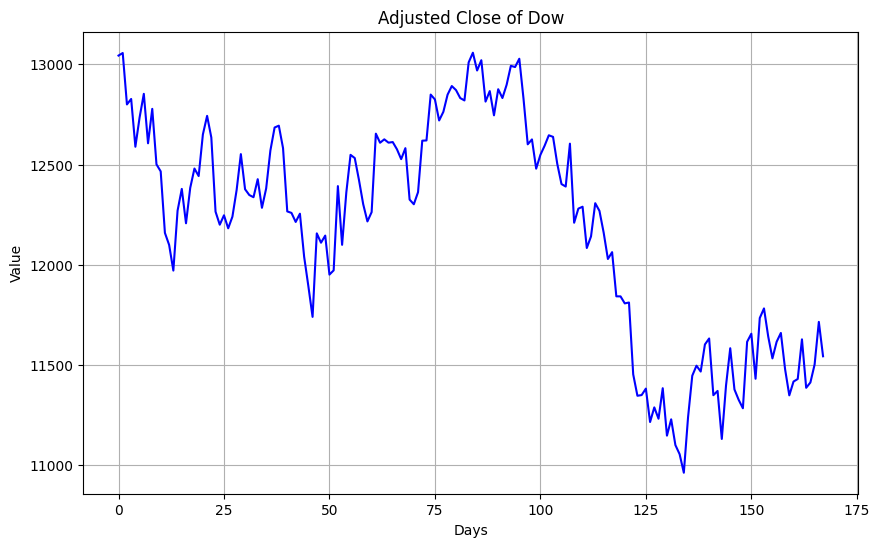

In [96]:
# Extract the data from the adjusted close
adjusted_close = dow[:, 5]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(adjusted_close, linestyle='-', color='b')
plt.title('Adjusted Close of Dow')
plt.xlabel('Days')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#### Question 10-5. Now over-plot this plot with a `red dot` marker for every day where the dow volume was greater than 5.5 billion.

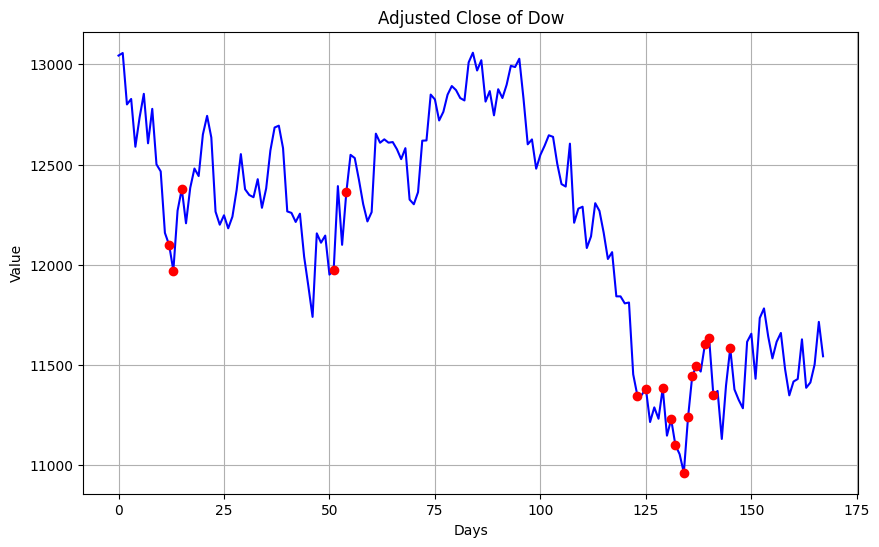

In [97]:
# Extract the data from the adjusted close
adjusted_close = dow[:, 5]

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(adjusted_close, linestyle='-', color='b')

# Highlight specific points
plt.plot(indices, adjusted_close[indices], 'ro', label='Highlight (Volume > 5.5 billion)')

plt.title('Adjusted Close of Dow')
plt.xlabel('Days')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### <font color="green">"Thank you for putting your efforts into the exercise problem sets 💯"</font>